Необходимо разработать программу, обнаруживающую объекты по их границам на изображении. Требуется составить матрицу свертки в соответствии и при помощи этой матрицы обработать входное изображение. В результате обработки изображения должны быть подсвечены зоны, соответствующие возможным границам объектов, указанных. По выделенным границам следует определить, имеется ли в них нужный объект. Далее необходимо сформировать новое изображение, в котором на однотонном фоне будут помещены обнаруженные фрагменты исходного изображения. Изображение обрабатывается в оттенках серого.


In [ ]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from PIL import Image, ImageDraw

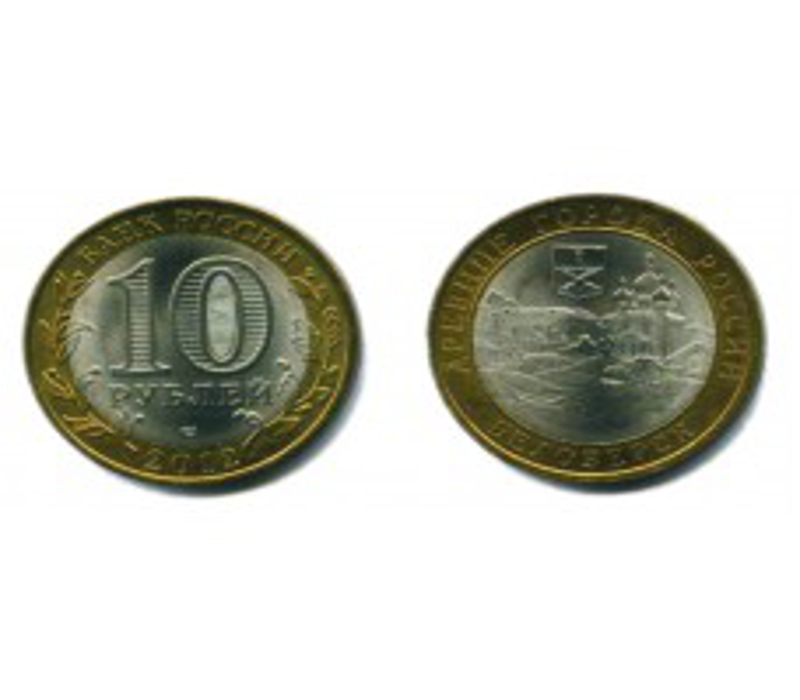

In [ ]:
image = Image.open('dengi5.jpg')
image = image.resize((800, 700))
image

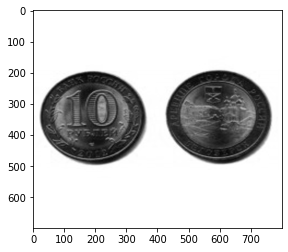

In [ ]:
img1p = image.load()
img = np.array([[int((img1p[x, y][0] + img1p[x, y][1] + img1p[x, y][2]) / 3) for x in range(image.size[0])] for y in range(image.size[1])])
plt.imshow(img)

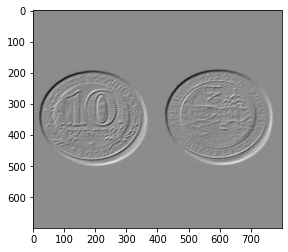

In [ ]:
k = np.array([[5, 10, 5], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-5, -10, -5]])


plt.gray()
res = ndimage.convolve(img, k)
res += ndimage.convolve(img, k.T)
plt.imshow(res)

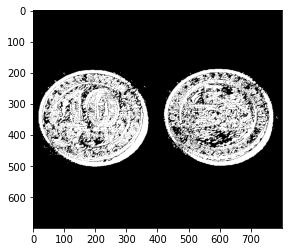

In [ ]:
imover = np.zeros(res.shape)
for i in range(res.shape[0]):
  for j in range(res.shape[1]):
    if abs(res[i,j]) > 120:
      imover[i, j] = 1

plt.imshow(imover)

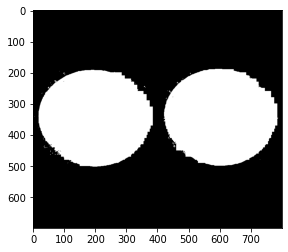

In [ ]:
for k in [*range(1, 4),5]:
  for i in range(0, imover.shape[0], 10):
    for j in range(0, imover.shape[1], 10):
      if imover[i, j] == imover[i, min([j+7*k, imover.shape[1] - 1])] == 1\
      and imover[i, j] == imover[min([i+3, imover.shape[0] - 1]), j] \
      and imover[i, j] == imover[min([i+11, imover.shape[0] - 1]), min([j+7*k, imover.shape[1] - 1])]:
        if k < 3 or i >= 7:
          imover[i:i+11,j:j+9*k] = 1

plt.imshow(imover)

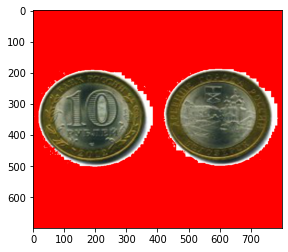

In [ ]:
p = Image.new(color=(255, 0, 0), size=(res.shape[1], res.shape[0]), mode='RGB')
q = ImageDraw.Draw(p)

w = np.asarray(image)
for x in range(image.size[1]):
  for y in range(image.size[0]):
    if abs(imover[x,y]):
      q.point((y, x), (w[x,y,0], w[x,y,1], w[x,y,2]))

plt.imshow(p)